In [1]:
from datascience import *
import numpy as np
import pandas as pd
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 35: Regression

Over the last two lessons, you went over regression in Data 8.3x. In these sections, you learned how to calculate the slope and intercept of a line fit to a bivariate sample. For example, using the `baby.csv` dataset, you can use regression to predict birthweight given the gestational age of the baby at birth. 

### Exercise 1

Find the least squares line that predicts birthweight based on the gestational age of a baby. You should use `minimize`, an optimization method in the `datascience` package. Note that you could use standardization (similar to what they did in Data 8.3x, `lec7.ipynb`) but the resulting intercept and slope would be in standardized units, and would need to be transformed in order to be interpretable. 

In [2]:
baby = Table.read_table('baby.csv')
baby.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


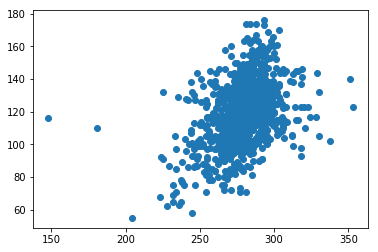

In [3]:
plt.scatter(baby.column(1),baby.column(0))
plt.show()

In [4]:
#Let's define a function like we did in 8.3x, specifically, we shall use the techinique of nested definitions.
def fit_line(Table):
    x=Table.column('Gestational Days')
    y=Table.column('Birth Weight')
    def MSE(slope,intercept):
        regression=x*slope+intercept
        return np.mean((y-regression)**2)
    LS_Line=minimize(MSE)
    LS_slope=LS_Line.item(0)
    LS_intercept=LS_Line.item(1)
    return [LS_slope,LS_intercept]

Data_fit=fit_line(baby)
print(Data_fit)
slope=Data_fit[0]
intercept=Data_fit[1]

[0.4284036994399665, -0.07039869065634102]


In the context of the data, interpret the intercept and slope. 

The slope asserts that the a baby gains approximately on AVERAGE .428 ounces for every day of gestation. The incercept, which according to our model is a negative number, sets a baby's birth weight at -.07 ounces for zero days of gestation. While the intercept lacks intuitive sense, you also aren't going to have a baby born on the day of conception, and we conclude that given the methods used on a empirical data set, our slope is sensible and our intercept is used to anchor the data in order to yield a model with least errors.

The slope is 0.428. It seems reasonable to expect this slope to be significantly higher than zero; it makes sense that gestational age would impact birthweight. Let's check using bootstrapping. 

In [5]:
#Perform a hypothesis test. Is the true slope zero or not? Perform a confidence interval. sample X Y pairs together. \
#Another bootstrap sample, another slope, sample pairs together

#Begin sampling pairs together
slopes=[]
for i in np.arange(1000):
    simulatedbaby=baby.sample()
    Data_fit=fit_line(simulatedbaby)
    slopes=np.append(slopes,Data_fit[0])    

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.4251551237447049 0.43268979800294016


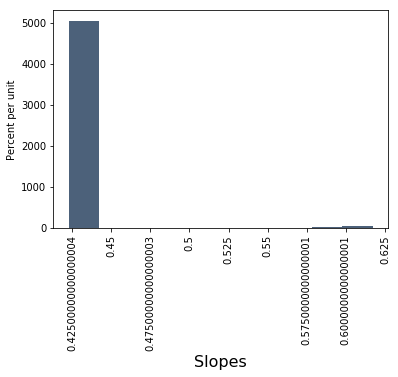

In [6]:
table_of_slopes=Table().with_column('Slopes',slopes)
table_of_slopes.hist()
LHInterval=np.percentile(slopes,2.5)
RHInterval=np.percentile(slopes,97.5)
print(LHInterval,RHInterval)

### Exercise 2

For a baby born at 40 weeks gestational age, what do we expect to be the average birthweight according to this model?

In [7]:
forty_weeks= slope*(40*7)+intercept
forty_weeks

119.88263715253427

Using bootstrapping, build a 95% confidence interval around this estimate. Interpret this interval, carefully. 

118.85654771644204 120.8922120143384


C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


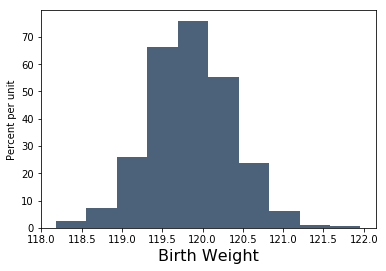

In [8]:
slopes=[]
intercepts=[]
forty_weeks=[]
for i in np.arange(1000):
    simulatedbaby=baby.sample()
    Data_fit=fit_line(simulatedbaby)
    slopes=np.append(slopes,Data_fit[0])
    intercepts=np.append(intercepts,Data_fit[1])
    forty_weeks=np.append(forty_weeks,Data_fit[0]*(40*7)+Data_fit[1])

table_forty_weeks=Table().with_column('Birth Weight',forty_weeks)
table_forty_weeks.hist()
print(np.percentile(forty_weeks,2.5),np.percentile(forty_weeks,97.5))

This is a confidence inteval on the **mean** birthweight for a baby born at 40 weeks. 

### Exercise 3

Suppose a baby is born at 40 weeks. Let's construct a confidence interval for the birthweight of *that baby*. This is different than the confidence interval on the mean birthweight of babies born at 40 weeks. This interval is known as a prediction interval. 

A simple way to find the prediction interval is to sample many times (with replacement) from the observed residuals and add to the predicted birthweight under the linear model. Find the percentiles of these simulations to obtain the interval. 

91.76563028969542 148.76610499761458


C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


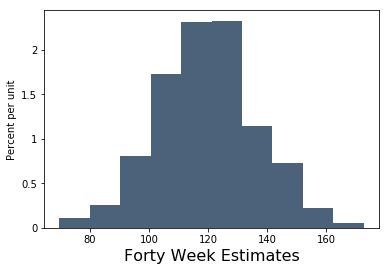

In [9]:
#How much variation an individual baby will have?
def errors(t, slope, intercept):
    ### t is the table (assume x and y points) -  are col 1 and col 2###
    ### Recall we are predicting distance (col 2 using col 1)
    RegressionLine=t.column(1)*slope+intercept #y=mx+b easy enough
    error=t.column(0)-RegressionLine
    return error
error=baby.column(0)- (slope*baby.column(1)+intercept)
residuals=[]
forty_weeks_resid=[]
slopes=[]
intercepts=[]
for i in np.arange(1000):
    simulatedbaby=baby.sample()
    Data_fit=fit_line(simulatedbaby)
    slopes=np.append(slopes,Data_fit[0])
    intercepts=np.append(intercepts,Data_fit[1])
    residuals=np.append(residuals,np.random.choice(error,size=1))
    forty_weeks_resid=np.append(forty_weeks_resid,(Data_fit[0]*(40*7)+Data_fit[1])+residuals[i])
print(percentile(5,forty_weeks_resid),percentile(95,forty_weeks_resid))
table_forty_weeks=Table().with_column('Forty Week Estimates',forty_weeks_resid)
table_forty_weeks.hist()

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


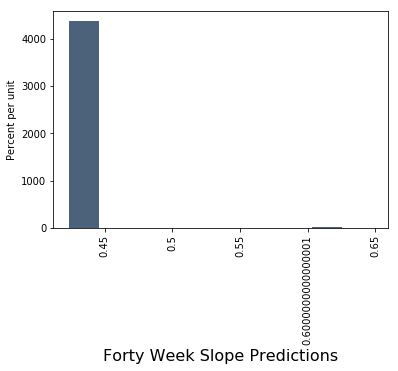

In [10]:
#Just for curiousity, let's look at the slopes and their distribution:
table_forty_weeks_slopes=Table().with_column('Forty Week Slope Predictions',slopes)
table_forty_weeks_slopes.hist()

C:\Users\C20KarlErik.VanHegew\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


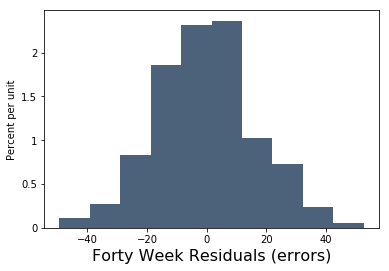

In [11]:
#And Residuals...
table_forty_weeks_residuals=Table().with_column('Forty Week Residuals (errors)',residuals)
table_forty_weeks_residuals.hist()

It turns out that this method is a little oversimplified. A "more correct" method is below. This requires taking into account the *leverage* of each data point (basically a measure of impact to the model of each data point). 

In [12]:
residuals=error 
pred=intercept+slope*150
leverage=1/baby.num_rows + ((baby.column(1)-np.mean(baby.column(1)))**2)/np.sum(((baby.column(1)-np.mean(baby.column(1)))**2))
adjresiduals=residuals/np.sqrt(1-leverage)

bs_all=[]
for _ in np.arange(5000):
    bs_y=(intercept+slope*baby.column(1))+np.random.choice(adjresiduals,size=baby.num_rows,replace=True)
    resample=Table().with_columns("y",bs_y,"x",baby.column(1))
    x=resample.column('x')
    y=resample.column('y')
    def MSE(slope,intercept):
        regression=x*slope+intercept
        return np.mean((y-regression)**2)
    bs_slope,bs_intercept=minimize(MSE)
    bs_residuals=bs_y-(bs_intercept+bs_slope*baby.column(1))
    bs_adjresiduals=bs_residuals/np.sqrt(1-leverage)
    bs_all=np.append(bs_all,150*(slope-bs_slope)+np.random.choice(bs_adjresiduals))

percentile([2.5,97.5],pred+bs_all)

array([31.3561498 , 97.93999815])